In [1]:
import os
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

In [2]:
kingfa_datasets_path = "./kingfadatasets/"

In [3]:
def wpt1D(data, wavelet='db1', mode='symmetric', maxlevel=4):
    wp = pywt.WaveletPacket(data=data[1750:2261], wavelet=wavelet, mode=mode, maxlevel=maxlevel)
    paths = [node.path for node in wp.get_level(maxlevel)]  # 列出所有树节点路径
    df_wpt = pd.DataFrame()  # 合并所有五级子节点
    for a in paths:
        df_wpt[a] = wp[a].data
    return df_wpt

In [4]:
X = np.array(pd.read_csv(kingfa_datasets_path+"data.csv", index_col=0))

In [5]:
wpt = wpt1D(X[0])

In [9]:
def z_score(x):
    return (x-np.max(x))/(np.max(x)-np.min(x))

In [11]:
wpt = wpt.apply(lambda x:z_score(x))

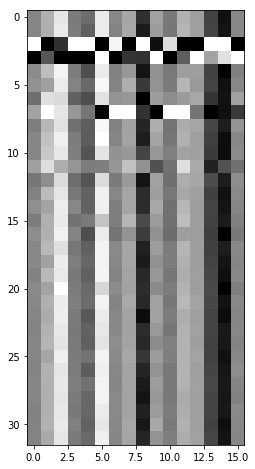

In [14]:
plt.figure(figsize=(15, 8))
plt.imshow(wpt.values, cmap=plt.cm.binary)
plt.show()

In [15]:
wptcolist = wpt.columns.values.tolist()

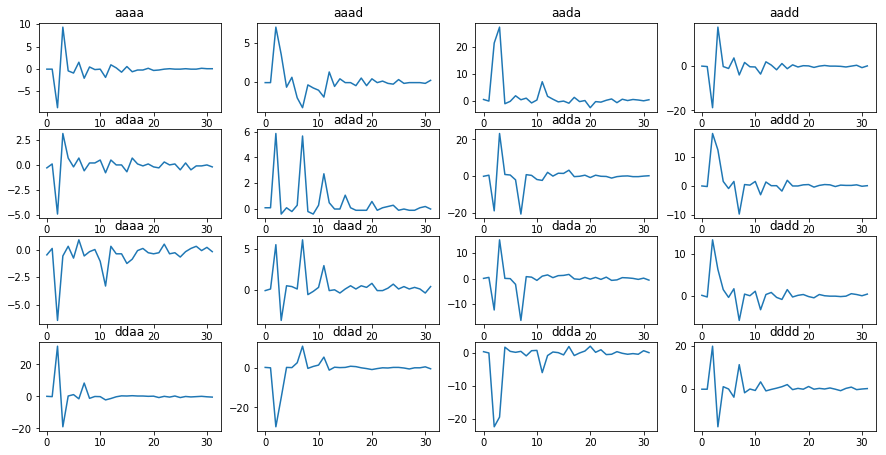

In [20]:
plt.figure(44, figsize=(15, 7.5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot(wpt.iloc[:, i])
    plt.title(wptcolist[i])
plt.show()

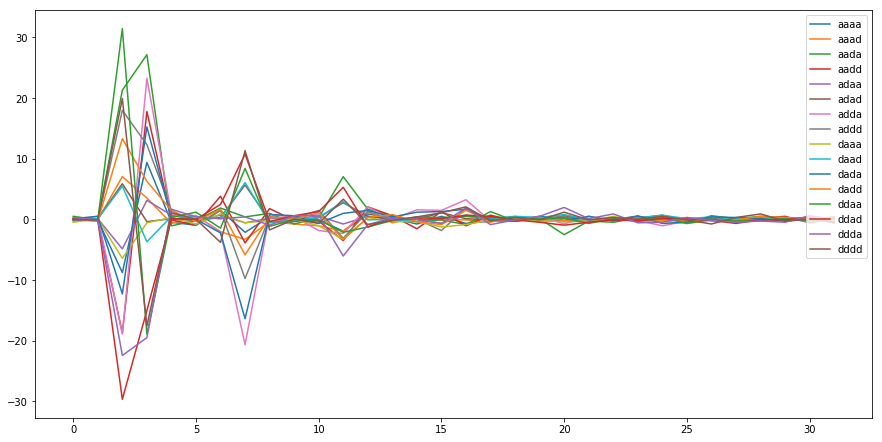

In [6]:
wpt1D(X[0]).plot(figsize=(15, 7.5))

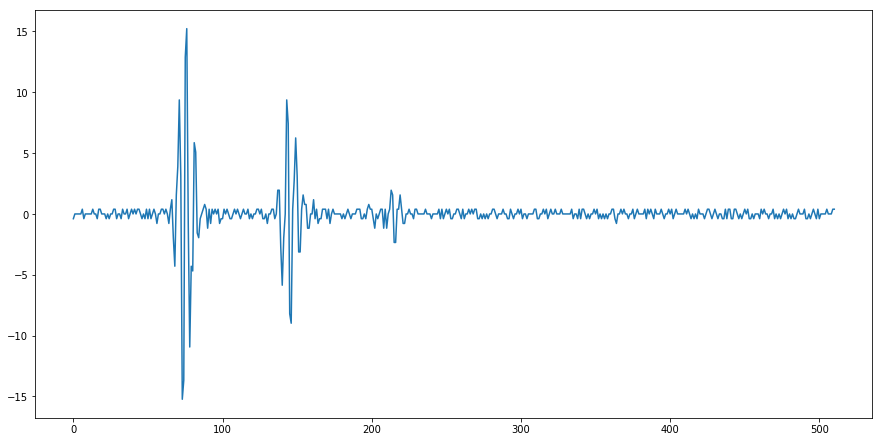

In [24]:
plt.figure(figsize=(15, 7.5))
plt.plot(X[0, 3500:4011])

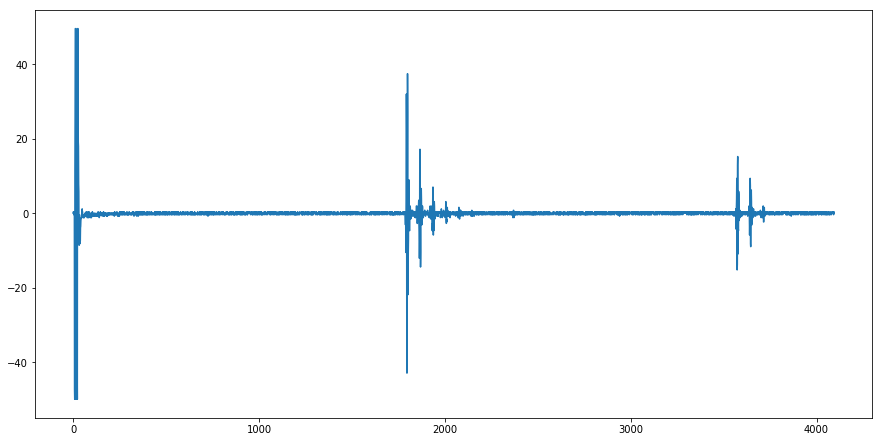

In [23]:
plt.figure(figsize=(15, 7.5))
plt.plot(X[0])